### Finding the parameters of a fitting function using Parametric Manager

First, we create a base config without the parameters that we want to have as an output in our representative fitting function

In [1]:
from ORBIT.phases.design import MonopileDesign
#from ORBIT.phases.install import MonopileInstallation

from ORBIT import ParametricManager, ProjectManager

In [2]:
# For this example we will look at the MonopileDesign module.
MonopileDesign.expected_config

{'site': {'depth': 'm', 'mean_windspeed': 'm/s'},
 'plant': {'num_turbines': 'int'},
 'turbine': {'rotor_diameter': 'm',
  'hub_height': 'm',
  'rated_windspeed': 'm/s'},
 'monopile_design': {'yield_stress': 'Pa (optional)',
  'load_factor': 'float (optional)',
  'material_factor': 'float (optional)',
  'monopile_density': 'kg/m3 (optional)',
  'monopile_modulus': 'Pa (optional)',
  'monopile_tp_connection_thickness': 'm (optional)',
  'transition_piece_density': 'kg/m3 (optional)',
  'transition_piece_thickness': 'm (optional)',
  'transition_piece_length': 'm (optional)',
  'soil_coefficient': 'N/m3 (optional)',
  'air_density': 'kg/m3 (optional)',
  'weibull_scale_factor': 'float (optional)',
  'weibull_shape_factor': 'float (optional)',
  'turb_length_scale': 'm (optional)',
  'monopile_steel_cost': 'USD/t (optional)',
  'tp_steel_cost': 'USD/t (optional)'}}

In [3]:
base_config = {
    
    "site": {
        
         "mean_windspeed": 8
    },
    "turbine": "SWT_6MW_154m_110m",
    "plant": {
        "num_turbines": 50
    }
}

In [4]:
#change parameters as needed
parameters = {
    "site.depth": [10, 20, 30, 40, 50, 60],
    "site.distance": [10, 20, 30, 40, 50, 60, 80, 90, 100, 110, 120]
}      

#change output costs in $ as needed
results = {
    "capex": lambda run: run.total_cost
}

parametric = ParametricManager(base_config, parameters, results, module=MonopileDesign, product=True) 
parametric.preview()
df = parametric.preview().values.tolist()

print(df)


ORBIT library intialized at 'c:\users\dmulash\documents\orbit\library'
10 runs elapsed time: 0.02s
66 runs estimated time: 0.16s
10 runs elapsed time: 0.02s
66 runs estimated time: 0.14s
[[40.0, 110.0, 183703320.76607573], [60.0, 100.0, 231419612.09312266], [50.0, 30.0, 207037381.3050805], [20.0, 80.0, 140289550.64117098], [50.0, 110.0, 207037381.3050805], [20.0, 30.0, 140289550.64117098], [40.0, 10.0, 183703320.76607573], [10.0, 120.0, 120272564.59952524], [50.0, 50.0, 207037381.3050805], [30.0, 90.0, 161444168.4832223]]


### Show parameters for the chosen function and plot

The function can be changed in the code

In [5]:
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a + (x*b) + (y**c) #choose the function to represent the data

x_data = []
y_data = []
z_data = []
for item in df:
    x_data.append(item[0])
    y_data.append(item[1])
    z_data.append(item[2])

# get fit parameters from scipy curve fit
parameters, covariance = curve_fit(function, [x_data, y_data], z_data)

# create surface function model
# setup data points for calculating surface model
model_x_data = np.linspace(min(x_data), max(x_data), 30)
model_y_data = np.linspace(min(y_data), max(y_data), 30)
# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)
# calculate Z coordinate array
Z = function(np.array([X, Y]), *parameters)

print(*parameters)



95311466.06495592 2225696.5611432726 2.9582381938507147


Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

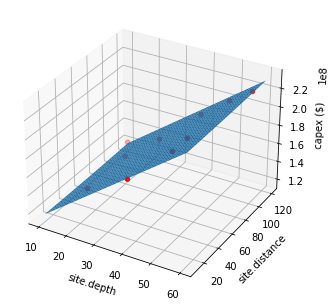

In [6]:
# setup figure object
fig = plt.figure()
# setup 3d object
ax = Axes3D(fig)
# plot surface
ax.plot_surface(X, Y, Z)
# plot input data
ax.scatter(x_data, y_data, z_data, color='red')
# set plot descriptions
ax.set_xlabel('site.depth')
ax.set_ylabel('site.distance')
ax.set_zlabel('capex ($)')

plt.show()